In [19]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
try:
  tpu = tf.distribute.cluster_resolver.TPUClusterResolver()
  print(tpu.cluster_spec().as_dict()['worker'])

except ValueError:
  raise BaseException("error")
tf.config.experimental_connect_to_cluster(tpu)
tf.tpu.experimental.initialize_tpu_system(tpu)
strategy = tf.distribute.TPUStrategy(tpu)

BaseException: ignored

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/reduced_books.csv")
ratings = pd.read_csv("/content/drive/MyDrive/reduced_ratings.csv")

In [ ]:
df

,book_id,title,ratings_count,author_id,average_rating,description,image_url,author_name,split_description,genres
0,3,Harry Potter and the Sorcerer's Stone (Harry P...,4765497,1077326,4.45,Harry Potter's life is miserable. His parents ...,https://images.gr-assets.com/books/1474154022m...,J.K. Rowling,"harry, potters, life, is, miserable, his, pare...","fantasy, paranormal, young-adult, fiction, chi..."
1,2657,To Kill a Mockingbird,3255518,1825,4.26,The unforgettable novel of a childhood in a sl...,https://images.gr-assets.com/books/1361975680m...,Harper Lee,"the, unforgettable, novel, of, a, childhood, i...","fiction, history, historical fiction, biograph..."
2,4671,The Great Gatsby,2758812,3190,3.89,"THE GREAT GATSBY, F. Scott Fitzgerald's third ...",https://images.gr-assets.com/books/1490528560m...,F. Scott Fitzgerald,"the, great, gatsby,, f, scott, fitzgeralds, th...","fiction, history, historical fiction, biograph..."
3,5907,The Hobbit,2099680,656983,4.25,In a hole in the ground there lived a hobbit. ...,https://images.gr-assets.com/books/1372847500m...,J.R.R. Tolkien,"in, a, hole, in, the, ground, there, lived, a,...","young-adult, fantasy, paranormal, children, fi..."
4,48855,The Diary of a Young Girl,2028299,3720,4.10,Discovered in the attic in which she spent the...,https://images.gr-assets.com/books/1358276407m...,Anne Frank,"discovered, in, the, attic, in, which, she, sp...","non-fiction, history, historical fiction, biog..."
...,...,...,...,...,...,...,...,...,...,...
7877,247951,The Children's War,201,144916,3.65,This is the story of two children caught in th...,https://images.gr-assets.com/books/1320452488m...,Monique Charlesworth,"this, is, the, story, of, two, children, caugh...","fiction, history, historical fiction, biograph..."
7878,244742,Constructive Living,201,59992,4.11,"Here, in plain language, is the definitive gui...",https://images.gr-assets.com/books/1301124403m...,David K. Reynolds,"here,, in, plain, language,, is, the, definiti...",non-fiction
7879,12775,When Things Fall Apart: Heartfelt Advice for H...,201,8052,4.29,Still appearing on the Publisher's Weekly best...,https://images.gr-assets.com/books/1359387116m...,Pema Chodron,"still, appearing, on, the, publishers, weekly,...",non-fiction
7880,43942,Ester and Ruzya: How My Grandmothers Survived ...,201,24695,4.09,"In the 1930s, as waves of war and persecution ...",https://images.gr-assets.com/books/1320395880m...,Masha Gessen,"in, the, 1930s,, as, waves, of, war, and, pers...","history, historical fiction, biography, non-fi..."


In [ ]:
ratings

,user_id,book_id,is_read,rating,is_reviewed
0,5,7061,1,5,0
1,5,520,0,0,0
2,5,7036,1,4,0
3,5,7026,0,0,0
4,5,7023,0,0,0
...,...,...,...,...,...
1428140,442593,68833,0,0,0
1428141,442593,1232,0,0,0
1428142,442593,22416,0,0,0
1428143,442593,57067,0,0,0


In [ ]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1428145 entries, 0 to 1428144
Data columns (total 5 columns):
 #   Column       Non-Null Count    Dtype
---  ------       --------------    -----
 0   user_id      1428145 non-null  int64
 1   book_id      1428145 non-null  int64
 2   is_read      1428145 non-null  int64
 3   rating       1428145 non-null  int64
 4   is_reviewed  1428145 non-null  int64
dtypes: int64(5)
memory usage: 54.5 MB


In [ ]:
ratings = ratings[ratings["rating"] > 0]

In [ ]:
ratings["rating"].min(), ratings["rating"].max(),

(1, 5)

In [ ]:
ratings["rating"] = ratings["rating"].values.astype(np.float32)

<ipython-input-9-11c833894329>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ratings["rating"] = ratings["rating"].values.astype(np.float32)


In [ ]:
user_ids = ratings["user_id"].unique().tolist()
book_ids = ratings["book_id"].unique().tolist()

In [ ]:
enumerate_userids = {x: i for i, x in enumerate(user_ids)}
enumerate_bookids = {x: i for i, x in enumerate(book_ids)}
enumerate_bookids_reverse = {i: x for i, x in enumerate(book_ids)}

In [ ]:
ratings["user_idx"] = ratings["user_id"].map(enumerate_userids)
ratings["book_idx"] = ratings["book_id"].map(enumerate_bookids)

<ipython-input-12-7f9c9499ca25>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ratings["user_idx"] = ratings["user_id"].map(enumerate_userids)
<ipython-input-12-7f9c9499ca25>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ratings["book_idx"] = ratings["book_id"].map(enumerate_bookids)


In [ ]:
ratings

,user_id,book_id,is_read,rating,is_reviewed,user_idx,book_idx
0,5,7061,1,5.0,0,0,0
2,5,7036,1,4.0,0,0,1
8,5,6957,1,4.0,0,0,2
9,5,6956,1,3.0,0,0,3
12,5,6900,1,3.0,0,0,4
...,...,...,...,...,...,...,...
1428066,442593,968,1,5.0,1,7463,282
1428067,442593,81922,1,3.0,1,7463,509
1428068,442593,16956,1,5.0,1,7463,842
1428131,442593,7061,1,3.0,1,7463,0


In [ ]:
x = ratings[['user_idx', 'book_idx']].values
x

array([[   0,    0],
       [   0,    1],
       [   0,    2],
       ...,
       [7463,  842],
       [7463,    0],
       [7463, 5665]])

In [ ]:
y = ratings['rating'].values
y.max(), y.min()

(5.0, 1.0)

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

reshaped_y = y.reshape(-1, 1)

y_norm = scaler.fit_transform(reshaped_y)

y_norm

array([[1.  ],
       [0.75],
       [0.75],
       ...,
       [1.  ],
       [0.5 ],
       [0.75]], dtype=float32)

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y_norm, test_size=0.2, random_state=42)

In [ ]:
#emedding
user_size = ratings["user_id"].nunique()

book_size = ratings["book_id"].nunique()
user_size, book_size

(7464, 7697)

In [ ]:
tf.random.set_seed(42)
embedding_size = 16
user_input = tf.keras.layers.Input(shape=[1])
user_embed_layer =tf.keras.layers.Embedding(user_size, embedding_size)(user_input)
users = tf.keras.layers.Flatten()(user_embed_layer)
book_input = tf.keras.layers.Input(shape=[1])
book_embed_layer = tf.keras.layers.Embedding(book_size, embedding_size)(book_input)
books = tf.keras.layers.Flatten()(book_embed_layer)
dot_product = tf.keras.layers.Dot(axes=1)(inputs=[users, books])

dropout_0 = tf.keras.layers.Dropout(0.5)(dot_product)
layer_1 = tf.keras.layers.Dense(150, activation='relu')(dropout_0)
dropout_1 = tf.keras.layers.Dropout(0.5)(layer_1)
layer_2 = tf.keras.layers.Dense(100, activation ='relu')(dropout_1)
dropout_2 = tf.keras.layers.Dropout(0.5)(layer_2)
layer_3 = tf.keras.layers.Dense(50, activation='relu')(dropout_2)
dropout_3 = tf.keras.layers.Dropout(0.5)(layer_3)
layer_4 = tf.keras.layers.Dense(1, activation='relu')(dropout_3)


model = tf.keras.Model([user_input, book_input], layer_4)

model.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.Adam(),
              metrics =["mae"])

In [ ]:
history = model.fit([x_train[:,0], x_train[:,1]], y_train, epochs=40, validation_split=0.2, batch_size=64)

Epoch 1/40
3610/3610 [==============================] - 40s 11ms/step - loss: 0.1991 - mae: 0.1991 - val_loss: 0.1795 - val_mae: 0.1795
Epoch 2/40
3610/3610 [==============================] - 39s 11ms/step - loss: 0.1808 - mae: 0.1808 - val_loss: 0.1795 - val_mae: 0.1795
Epoch 3/40
3610/3610 [==============================] - 43s 12ms/step - loss: 0.1805 - mae: 0.1805 - val_loss: 0.1794 - val_mae: 0.1794
Epoch 4/40
3610/3610 [==============================] - 40s 11ms/step - loss: 0.1795 - mae: 0.1795 - val_loss: 0.1792 - val_mae: 0.1792
Epoch 5/40
3610/3610 [==============================] - 40s 11ms/step - loss: 0.1778 - mae: 0.1778 - val_loss: 0.1789 - val_mae: 0.1789
Epoch 6/40
3610/3610 [==============================] - 39s 11ms/step - loss: 0.1763 - mae: 0.1763 - val_loss: 0.1785 - val_mae: 0.1785
Epoch 7/40
3610/3610 [==============================] - 37s 10ms/step - loss: 0.1748 - mae: 0.1748 - val_loss: 0.1781 - val_mae: 0.1781
Epoch 8/40
3610/3610 [==========================

<Axes: >

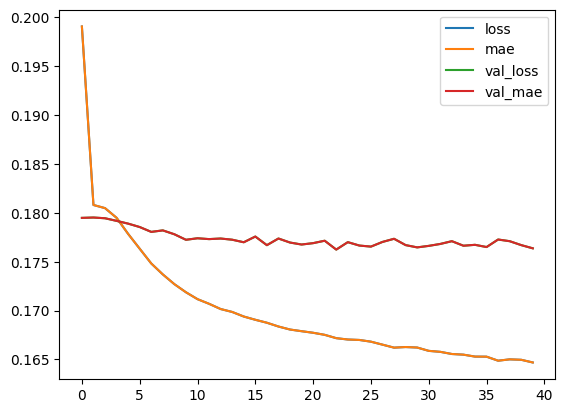

In [ ]:
pd.DataFrame(history.history).plot()

In [ ]:
model.save('model_6.h5')

In [ ]:
model.evaluate([x_test[:, 0], x_test[:, 1]],  y_test)

2256/2256 [==============================] - 19s 8ms/step - loss: 0.1778 - mae: 0.1778


[0.17775368690490723, 0.17775368690490723]

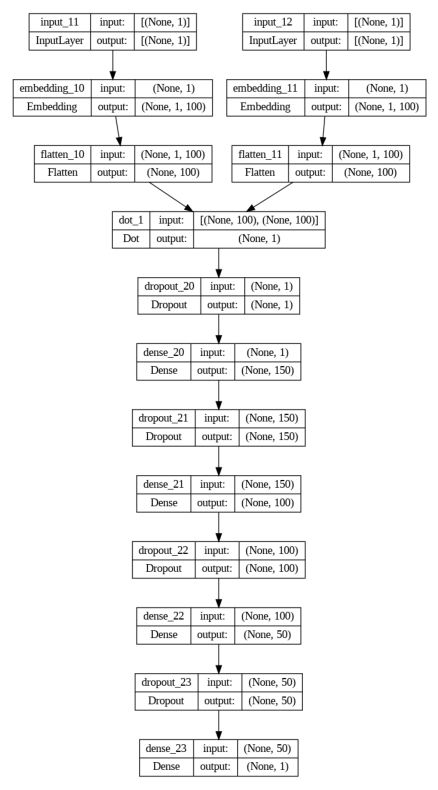

In [25]:
loaded_model = tf.keras.models.load_model("model_6.h5")
plt.figure(figsize=(10, 10))  # Adjust the figure size as needed
tf.keras.utils.plot_model(loaded_model, to_file='model.png', show_shapes=True, show_layer_names=True)
plt.imshow(plt.imread('model.png'))
plt.axis('off')  # Hide axes
plt.show()



